In [1]:
import pandas as pd
import pickle
import sys
sys.path.append('..')
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
folder = 'result/100-100_180_0.7_0.8/'
res_folder = folder + 'NormInitm_ST_1.0_0.5_10.0_0.100000/'

In [3]:
with open(res_folder + 'ST_rhat_error.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    result1 =  pickle.load(f)
i = 0
for key in result1:
    me = np.mean(result1[key], axis = 0)
    sd = np.std(result1[key], axis = 0)
    print(key, '& %.2f & %.2f (%.2f) & %.2f (%.2f) \\\\' %(me[0], me[1],sd[1], me[2], sd[2]))
    i = i +1 

-2 & 0.02 & 0.04 (0.15) & 0.03 (0.06) \\
-1 & 0.16 & 0.03 (0.14) & 0.04 (0.10) \\
0 & 0.50 & 0.06 (0.15) & 0.09 (0.14) \\


In [4]:
with open(res_folder + 'SPD_ST_rhat_error.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    result3 =  pickle.load(f)


In [6]:
res_mixedcca1 = pd.read_csv(folder +'FALSEmixedcca/error.csv', header=None, sep = ' ').values


In [16]:
df_all = None
trunc = [-2,-1,0]
for i in range(3):
    df1 = pd.DataFrame(result1[trunc[i]][:, 1], columns = ['error'])
    df1['Algorithm'] = 'Simulated tempering'
    df2 = pd.DataFrame(res_mixedcca1[:, 14*i], columns = ['error'])
    df2['Algorithm'] = 'MixedCCA-BIC1'
    df3 = pd.DataFrame(res_mixedcca1[:, 14*i+6], columns = ['error'])
    df3['Algorithm'] = 'MixedCCA-BIC2'
    df_x = pd.concat([df1, df2, df3], sort=False)
    df_x['direction'] = 'vx'
    df1 = pd.DataFrame(result1[trunc[i]][:, 2], columns = ['error'])
    df1['Algorithm'] = 'Simulated tempering'
    df2 = pd.DataFrame(res_mixedcca1[:, 14*i+1], columns = ['error'])
    df2['Algorithm'] = 'MixedCCA-BIC1'
    df3 = pd.DataFrame(res_mixedcca1[:, 14*i+7], columns = ['error'])
    df3['Algorithm'] = 'MixedCCA-BIC2'
    df_y = pd.concat([df1, df2, df3], sort=False)
    df_y['direction'] = 'vy'
#     df11 = pd.DataFrame(np.array([result1[-2][:, 1], res_mixedcca1[:, 0], res_mixedcca1[:, 6]] ).T, columns = ['Simulated tempering', 'MixedCCA-BIC1', 'MixedCCA-BIC2'])
#     df11['direction'] = 'vx'
#     df12 = pd.DataFrame(np.array([result1[-2][:, 2], res_mixedcca1[:, 1], res_mixedcca1[:, 7]] ).T, columns = ['Simulated tempering', 'MixedCCA-BIC1', 'MixedCCA-BIC2'])
#     df12['direction'] = 'vy'
    df = pd.concat([df_x, df_y], sort=False)
    df['C'] = trunc[i]
    df_all = pd.concat([df_all, df], sort=False)

In [8]:
index = []

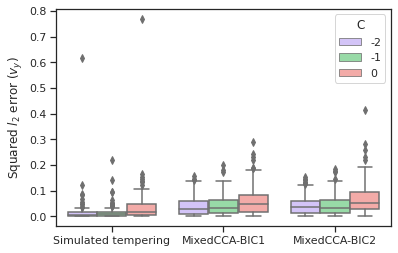

In [9]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Algorithm", y="error",
            hue="C", palette=["m", "g", "r"], showfliers = True,
            data=df_all[df_all['direction'] == 'vx'].drop(index)).set(
    xlabel=None, 
    ylabel=f'Squared $l_2$ error ($v_y$)'
#     ylabel=f'Squared $l_2$ error ($v_y$)'
)
# sns.despine(offset=10, trim=False)

plt.savefig('merrorx_remove.png', bbox_inches = 'tight')

In [31]:
arr1 = df_all[(df_all['C'] ==0) & 
       (df_all['direction']=='vx') & 
       (df_all['Algorithm'] =='Simulated tempering')]['error']
# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = arr1[(arr1 < lower_bound) | (arr1 > upper_bound)]
print(len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))
print(np.mean(np.delete(list(arr1), index)))

np.std(np.delete(list(arr1), index))


8
The following are the outliers in the boxplot:19    0.145425
29    0.769565
31    1.247323
58    0.152765
64    0.134975
69    0.137380
83    0.165735
93    0.257833
Name: error, dtype: float64
0.05676925105357448


0.14699253044159877